<a href="https://colab.research.google.com/github/BhawnaRajput01/practice_project/blob/main/ecommerce_fraud_datection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E-commerce fraud refers to any deceptive or unlawful activity that occurs during online transactions on e-commerce platforms. With the rapid growth of online shopping, e-commerce fraud has become a significant concern for businesses, consumers, and financial institutions alike. Understanding the background of e-commerce fraud involves recognizing its various forms, the motivations behind it, and the challenges it presents.

To download the dataset used in this project can be download from kaggle. The link is given below
https://www.kaggle.com/datasets/aryanrastogi7767/ecommerce-fraud-data/data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import pandas as pd
# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2022WI folder and put all the files under A4 folder, then "2022WI/A4"
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "ecommerce_fraud_detection_dataset"
GOOGLE_DRIVE_PATH = os.path.join("drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))


# Add to sys so we can import .py files.
sys.path.append(GOOGLE_DRIVE_PATH)

[]


In [ ]:
customers_df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH,'customers_df.csv'))
customer_transaction_details = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH,'customer_transaction_details.csv'))

In [ ]:
customers_df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [ ]:
customer_transaction_details.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [ ]:
customer_transaction_details.isna().any()

Unnamed: 0                          False
customerEmail                       False
transactionId                       False
orderId                             False
paymentMethodId                     False
paymentMethodRegistrationFailure    False
paymentMethodType                   False
paymentMethodProvider               False
transactionAmount                   False
transactionFailed                   False
orderState                          False
dtype: bool

In [ ]:
customers_df.isna().any()

Unnamed: 0                False
customerEmail             False
customerPhone             False
customerDevice            False
customerIPAddress         False
customerBillingAddress    False
No_Transactions           False
No_Orders                 False
No_Payments               False
Fraud                     False
dtype: bool

In [ ]:
customers_df.duplicated().any()

False

In [ ]:
customer_transaction_details.duplicated().any()

False

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [ ]:
customer_transaction_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [ ]:
customers_df['Fraud'].replace({True: 1, False: 0}, inplace=True)


In [ ]:
customer_transaction_details['paymentMethodType'].value_counts()

paymentMethodType
card         479
apple pay     49
paypal        48
bitcoin       47
Name: count, dtype: int64

In [ ]:
# Check for duplicate values in each column
duplicate_columns = customers_df.apply(lambda x: x.duplicated().any())

print("Columns with duplicate values:")
print(duplicate_columns)


Columns with duplicate values:
Unnamed: 0                False
customerEmail              True
customerPhone             False
customerDevice            False
customerIPAddress          True
customerBillingAddress     True
No_Transactions            True
No_Orders                  True
No_Payments                True
Fraud                      True
dtype: bool


In [ ]:
# Check for duplicate values in each column
duplicate_columns = customer_transaction_details.apply(lambda x: x.duplicated().any())

print("Columns with duplicate values:")
print(duplicate_columns)


Columns with duplicate values:
Unnamed: 0                          False
customerEmail                        True
transactionId                       False
orderId                              True
paymentMethodId                      True
paymentMethodRegistrationFailure     True
paymentMethodType                    True
paymentMethodProvider                True
transactionAmount                    True
transactionFailed                    True
orderState                           True
dtype: bool


 ***DATA
 VISUALIZATION***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt


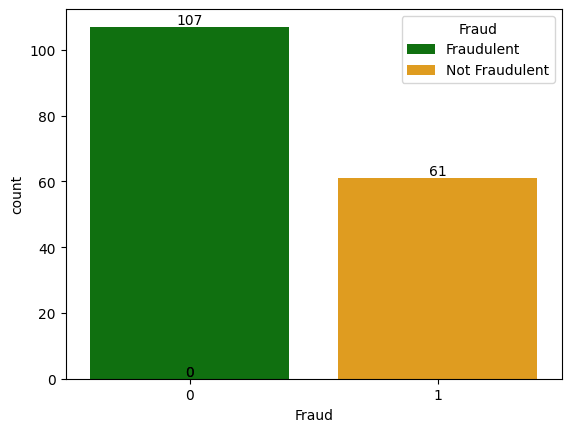

In [ ]:
# Create count plot with hue
sns.countplot(x='Fraud', hue='Fraud', data=customers_df, palette={0: 'green', 1: 'orange'})
ax = plt.gca()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height, '%d' % height,
            fontsize=10, ha='center', va='bottom')

# Add legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Fraudulent', 'Not Fraudulent'], title='Fraud', loc='upper right')

# Display the plot
plt.show()

In [ ]:

# Create the boxplot
boxplot = alt.Chart(customers_df).mark_boxplot().encode(
    x=alt.X('Fraud:O', title='Fraud Analysis'),  # Use ordinal scale for categorical variable
    y=alt.Y('No_Transactions:Q', title='No. of Transactions'),
    color=alt.Color('Fraud:N')
).properties(height=400, width=500)

boxplot
## Blue - Not fraud Transaction
## Orange - Fraud Transaction

alt.Chart(...)

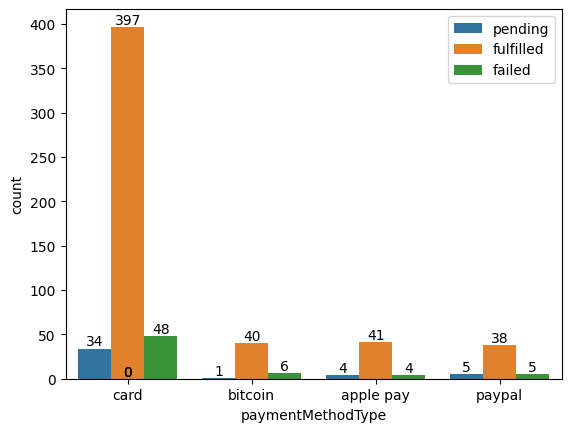

In [ ]:
sns.countplot(x='paymentMethodType',hue='orderState',data = customer_transaction_details )
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=10, ha='center', va='bottom')
ax.legend()
plt.show()

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 13.2+ KB


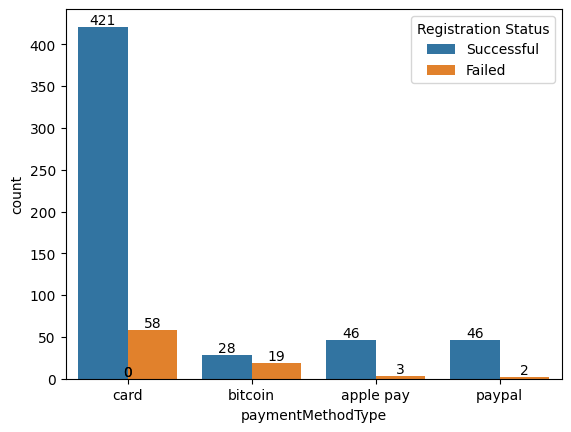

In [ ]:
sns.countplot(x='paymentMethodType',hue='paymentMethodRegistrationFailure',data = customer_transaction_details )
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=10, ha='center', va='bottom')
# Add legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Successful', 'Failed'], title='Registration Status')

plt.show()



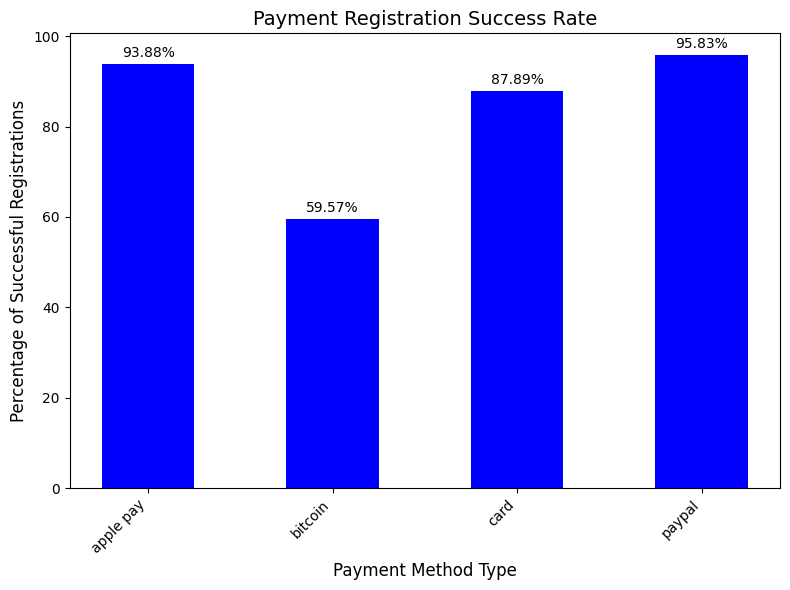

In [ ]:
## Calculating percentage

# Group the data by paymentMethodType and paymentMethodRegistrationFailure
grouped = customer_transaction_details.groupby(['paymentMethodType', 'paymentMethodRegistrationFailure']).size().reset_index(name='Count')

# Pivot the data to get successful and failed counts for each paymentMethodType
pivoted = grouped.pivot(index='paymentMethodType', columns='paymentMethodRegistrationFailure', values='Count').reset_index()
pivoted = pivoted.rename_axis(None, axis=1).rename_axis(None, axis=1)
pivoted = pivoted.fillna(0)

# Calculate the percentage of successful registrations
pivoted['Total'] = pivoted[0] + pivoted[1]
pivoted['Success_Percentage'] = (pivoted[0] / pivoted['Total']) * 100

# Plot the data
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.5
index = np.arange(len(pivoted))

bars = ax.bar(index, pivoted['Success_Percentage'], bar_width, color='blue')

ax.set_xlabel('Payment Method Type', fontsize=12)
ax.set_ylabel('Percentage of Successful Registrations', fontsize=12)
ax.set_title('Payment Registration Success Rate', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(pivoted['paymentMethodType'], rotation=45, ha='right')

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Axes: xlabel='No_Transactions', ylabel='transactionFailed'>

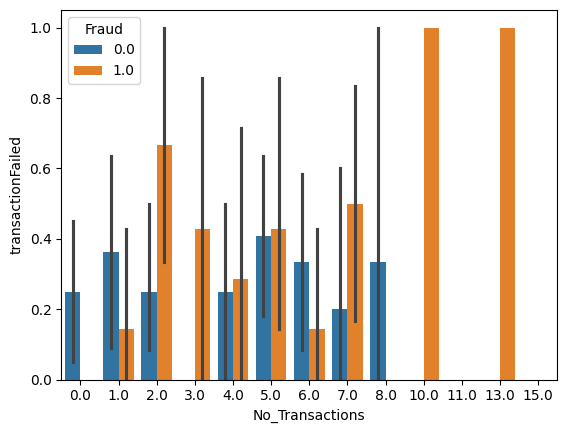

In [ ]:
sns.barplot(x = customers_df['No_Transactions'],y = customer_transaction_details['transactionFailed'],hue = customers_df['Fraud'])

In [ ]:
comb_data = customers_df[customers_df['customerEmail'].isin(customer_transaction_details['customerEmail'])== True].reset_index(drop=True)
comb_data.shape

(143, 10)

In [ ]:
comb_data.drop('Unnamed: 0',axis = 1, inplace = True)


In [ ]:
dat2_shape = customer_transaction_details.shape
dat2_shape

(623, 11)

In [ ]:
## Adding No_transactionsFail from customer_transaction_details of common mail ids
comb_shape = comb_data.shape
dat2_shape = customer_transaction_details.shape
No_transactionsFail = []
for i in range(0,comb_shape[0]):
    s=0
    for j in range(0,dat2_shape[0]):
        if(comb_data['customerEmail'][i]==customer_transaction_details['customerEmail'][j]):
            s += customer_transaction_details['transactionFailed'][j]
    No_transactionsFail.append(s)
comb_data['No_transactionsFail'] = No_transactionsFail

comb_data

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,No_transactionsFail
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,1
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,2
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,2
...,...,...,...,...,...,...,...,...,...,...
138,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,1,0
139,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,1,1
140,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,1,6
141,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,1,2


In [ ]:
Total_transaction_amt = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(comb_data['customerEmail'][i]==customer_transaction_details['customerEmail'][j]):
            s += customer_transaction_details['transactionAmount'][j]
    Total_transaction_amt.append(s)
comb_data['Total_transaction_amt'] = Total_transaction_amt

comb_data

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,No_transactionsFail,Total_transaction_amt
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0,44
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,1,111
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,2,131
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,0,85
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,2,411
...,...,...,...,...,...,...,...,...,...,...,...
138,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,1,0,126
139,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,1,1,149
140,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,1,6,1033
141,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,1,2,378


In [ ]:
paymentRegFailure = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(comb_data['customerEmail'][i]==customer_transaction_details['customerEmail'][j]):
            s += customer_transaction_details['paymentMethodRegistrationFailure'][j]
    paymentRegFailure.append(s)
comb_data['PaymentRegFail'] = paymentRegFailure


In [ ]:
def col_make(column_name,category):
    array = []
    for i in range(0,143):
        s=0
        for j in range(0,623):
            if(comb_data['customerEmail'][i]==customer_transaction_details['customerEmail'][j]):
                if customer_transaction_details[column_name][j]==category:
                    s+=1
        array.append(s)
    return array

In [ ]:

# Define function to perform one-hot encoding for a specified column and category
def col_make(column_name, category, comb_data, customer_transaction_details):
    array = []
    for i in range(len(comb_data)):
        s = 0
        email_id = comb_data['customerEmail'][i]
        if email_id in customer_transaction_details['customerEmail'].values:
            for j in range(len(customer_transaction_details)):
                if customer_transaction_details['customerEmail'][j] == email_id and customer_transaction_details[column_name][j] == category:
                    s += 1
        array.append(s)
    return array

# Define categories and column names
payment_categories = ['paypal', 'apple pay', 'bitcoin', 'card']
order_categories = ['fulfilled', 'failed', 'pending']
provider_categories = ['JCB 16 digit', 'American Express', 'VISA 16 digit', 'Discover', 'Voyager', 'VISA 13 digit', 'Maestro', 'Mastercard', 'Diners Club / Carte Blanche', 'JCB 15 digit']

# Assuming 'comb_data' is the DataFrame where you want to add the new columns
# Replace 'comb_data' with the actual DataFrame where you want to add the new columns
# Assuming 'customer_transaction_details' is the DataFrame containing transaction details
# Replace 'customer_transaction_details' with the actual DataFrame containing transaction details
# Adjust the function call as per your DataFrame names
for category in payment_categories:
    comb_data[f'{category}_Payments'] = col_make('paymentMethodType', category, comb_data, customer_transaction_details)

for category in order_categories:
    comb_data[f'Orders{category.capitalize()}'] = col_make('orderState', category, comb_data, customer_transaction_details)

for category in provider_categories:
    comb_data[category.replace(' ', '_')] = col_make('paymentMethodProvider', category, comb_data, customer_transaction_details)

# Display the resulting DataFrame


In [ ]:
comb_data.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,No_transactionsFail,...,JCB_16_digit,American_Express,VISA_16_digit,Discover,Voyager,VISA_13_digit,Maestro,Mastercard,Diners_Club_/_Carte_Blanche,JCB_15_digit
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0,...,2,0,0,0,0,0,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,1,...,0,2,1,0,0,0,0,0,0,0
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,2,...,4,0,0,1,0,0,0,0,0,0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,0,...,0,0,0,0,3,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,2,...,3,1,2,0,0,1,0,0,0,0


In [ ]:
import pandas as pd


In [ ]:
failed_trans = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(comb_data['customerEmail'][i]==customer_transaction_details['customerEmail'][j]):
            if (customer_transaction_details['orderState'][j]=='fulfilled') & (customer_transaction_details['transactionFailed'][j]==1):
                s+=1
    failed_trans.append(s)
comb_data['Transcation_failed'] = failed_trans


In [ ]:
comb_data['Fraud_1']= comb_data['Fraud_1'].replace({True:1,False:0})

In [ ]:

def count_duplicates(column, data):
    duplicates = []
    for i in range(len(data)):
        count = sum(data[column][i] == data[column])
        duplicates.append(count - 1)  # Subtract 1 to exclude the current row
    return duplicates

def preprocess_data(data):
    data['Duplicate_IP'] = count_duplicates('customerIPAddress', data)
    data['Duplicate_Address'] = count_duplicates('customerBillingAddress', data)
    data = pd.get_dummies(data, columns=['Fraud'], prefix=['Fraud'], drop_first=True)
    data.rename(columns={"Fraud_True": "Fraud"}, inplace=True)
    return data

comb_data= preprocess_data(comb_data)



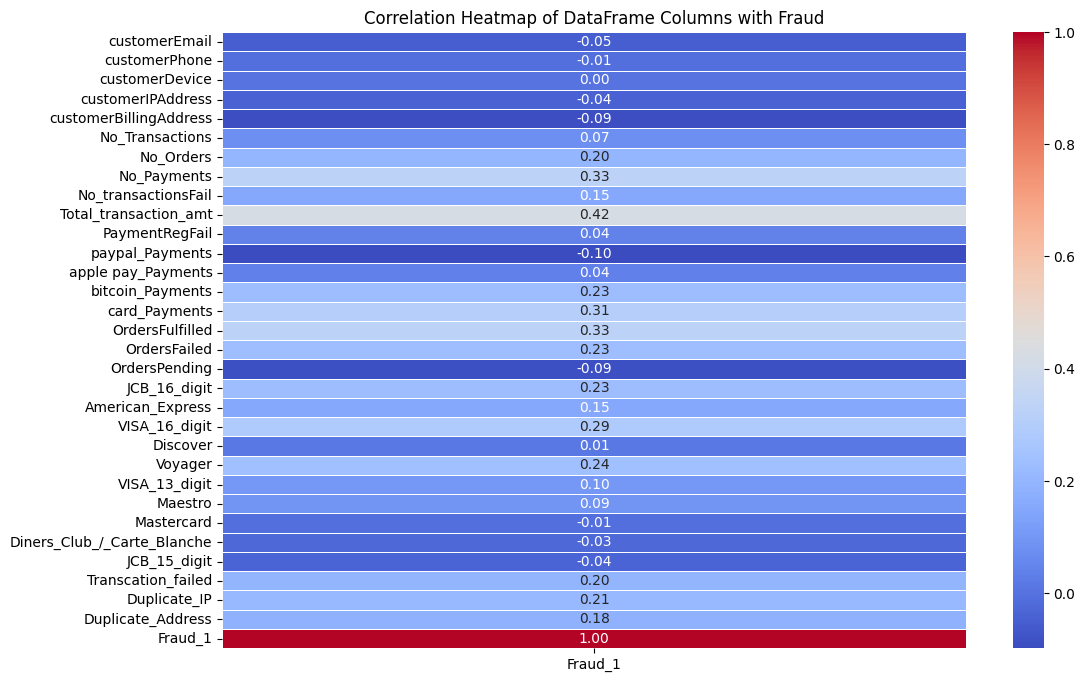

In [ ]:

# Convert object columns to integers by assigning unique integer values
comb_data_numeric = comb_data.copy()
for column in comb_data_numeric.select_dtypes(include=['object']):
    comb_data_numeric[column] = comb_data_numeric[column].astype('category').cat.codes

correlation_matrix = comb_data_numeric.corr()

# Plot correlation matrix heatmap with 'Fraud' column
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Fraud_1']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of DataFrame Columns with Fraud')
plt.show()


In [ ]:
comb_data_numeric.customerEmail.nunique()

136

In [ ]:
customers_df.loc[~customers_df.customerEmail.isin(customer_transaction_details.customerEmail)].customerEmail.nunique()

25

In [ ]:
customer_transaction_details[~comb_data.isin(customer_transaction_details)]

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,josephhoward@yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,evansjeffery@yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,evansjeffery@yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,evansjeffery@yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
customers_df.customerEmail.nunique()

161

In [ ]:
correlation_matrix

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,...,Voyager,VISA_13_digit,Maestro,Mastercard,Diners_Club_/_Carte_Blanche,JCB_15_digit,Transcation_failed,Duplicate_IP,Duplicate_Address,Fraud_1
customerEmail,1.000000,-0.109464,0.018744,0.022231,0.003427,-0.086801,-0.027906,-0.034200,-0.089851,-0.043134,...,-0.087570,0.068963,-0.058011,-0.021789,0.033554,-0.027621,-0.090527,0.060281,-0.009421,-0.052507
customerPhone,-0.109464,1.000000,-0.036939,0.133088,0.098444,-0.024622,-0.042695,0.138603,-0.007035,-0.041804,...,-0.054429,-0.023846,0.039901,-0.160211,-0.012887,0.002614,-0.027912,-0.068834,-0.081562,-0.012494
customerDevice,0.018744,-0.036939,1.000000,0.033590,-0.094564,-0.042045,-0.013968,-0.045423,-0.121335,-0.135877,...,0.064018,-0.002833,-0.126053,-0.106275,-0.139316,0.078922,-0.127265,0.019520,0.096929,0.003818
customerIPAddress,0.022231,0.133088,0.033590,1.000000,0.072423,-0.089247,-0.028639,-0.049021,-0.063759,0.042663,...,-0.081602,-0.071051,0.080252,0.107503,-0.109183,0.043451,-0.078602,0.010383,-0.081336,-0.043328
customerBillingAddress,0.003427,0.098444,-0.094564,0.072423,1.000000,0.095460,0.004196,-0.209955,0.090540,0.035639,...,-0.020248,-0.017178,-0.028786,-0.028030,-0.009781,0.173631,0.032587,-0.094992,-0.028562,-0.092399
No_Transactions,-0.086801,-0.024622,-0.042045,-0.089247,0.095460,1.000000,0.833884,0.095741,0.564799,0.327495,...,0.063663,0.343132,0.051891,0.100162,0.341257,0.252930,0.522933,0.060181,-0.040109,0.074120
No_Orders,-0.027906,-0.042695,-0.013968,-0.028639,0.004196,0.833884,1.000000,0.211471,0.214019,0.329055,...,0.081184,0.265368,0.085235,0.072498,0.059203,0.203064,0.247054,0.065206,-0.029331,0.199480
No_Payments,-0.034200,0.138603,-0.045423,-0.049021,-0.209955,0.095741,0.211471,1.000000,-0.092249,-0.031825,...,-0.031648,0.065291,-0.068931,0.016177,0.070811,-0.050188,-0.053817,0.212416,0.205703,0.327098
No_transactionsFail,-0.089851,-0.007035,-0.121335,-0.063759,0.090540,0.564799,0.214019,-0.092249,1.000000,0.737983,...,0.311456,0.225570,0.412999,0.017821,0.353655,0.124480,0.929363,-0.019994,-0.063308,0.152701
Total_transaction_amt,-0.043134,-0.041804,-0.135877,0.042663,0.035639,0.327495,0.329055,-0.031825,0.737983,1.000000,...,0.420993,0.099649,0.587123,-0.019234,0.051556,0.085393,0.735455,-0.040827,-0.050875,0.421429


In [ ]:
## Dropping object type coloums
x = comb_data.drop(['customerEmail','customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress','Fraud_1'], axis=1)
y = comb_data['Fraud_1']

In [ ]:
x.columns

Index(['No_Transactions', 'No_Orders', 'No_Payments', 'No_transactionsFail',
       'Total_transaction_amt', 'PaymentRegFail', 'paypal_Payments',
       'apple pay_Payments', 'bitcoin_Payments', 'card_Payments',
       'OrdersFulfilled', 'OrdersFailed', 'OrdersPending', 'JCB_16_digit',
       'American_Express', 'VISA_16_digit', 'Discover', 'Voyager',
       'VISA_13_digit', 'Maestro', 'Mastercard', 'Diners_Club_/_Carte_Blanche',
       'JCB_15_digit', 'Transcation_failed', 'Duplicate_IP',
       'Duplicate_Address'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train.shape

(107, 26)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

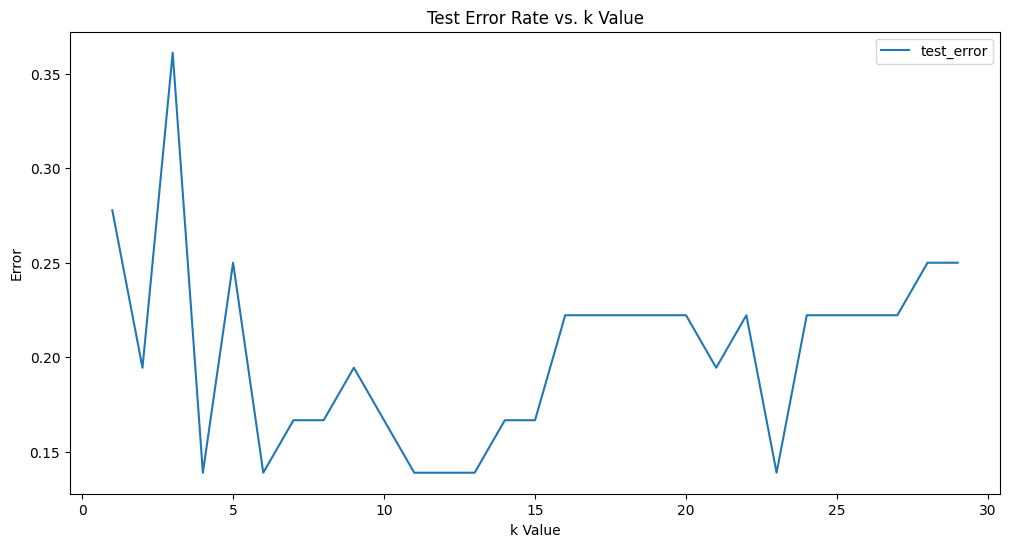

In [ ]:

def plot_test_error_rate(x_train, y_train, x_test, y_test, k_range):
    test_error_rate = []
    for k in k_range:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(x_train, y_train)
        y_p_test = knn_model.predict(x_test)
        test_error = 1 - accuracy_score(y_test, y_p_test)
        test_error_rate.append(test_error)

    plt.figure(figsize=(12, 6))
    plt.plot(k_range, test_error_rate, label='test_error')
    plt.legend()
    plt.xlabel('k Value')
    plt.ylabel('Error')
    plt.title('Test Error Rate vs. k Value')
    plt.show()

plot_test_error_rate(x_train, y_train, x_test, y_test, range(1, 30))


              precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       1.00      0.62      0.76        13

    accuracy                           0.86        36
   macro avg       0.91      0.81      0.83        36
weighted avg       0.89      0.86      0.85        36



<Axes: >

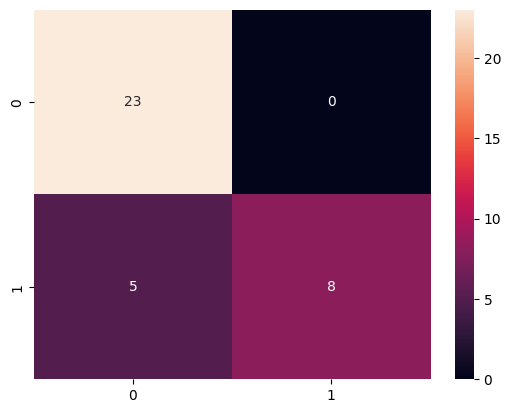

In [ ]:
## for k =6, we have min error value, (See trends in graph)
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model = knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot = True)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.54      0.70        13

    accuracy                           0.83        36
   macro avg       0.90      0.77      0.79        36
weighted avg       0.87      0.83      0.82        36



<Axes: >

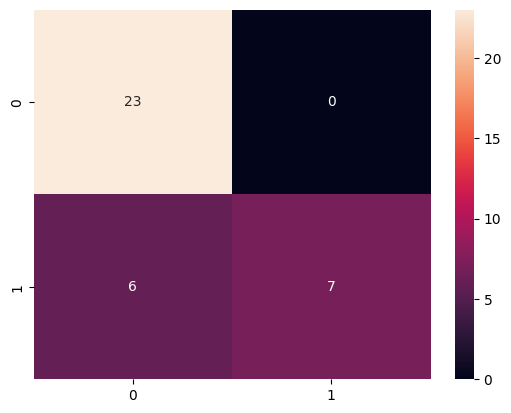

In [ ]:
svc = SVC()
svc = svc.fit(x_train, y_train)
y_pred_svm = svc.predict(x_test)
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot = True)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.82      0.69      0.75        13

    accuracy                           0.83        36
   macro avg       0.83      0.80      0.81        36
weighted avg       0.83      0.83      0.83        36



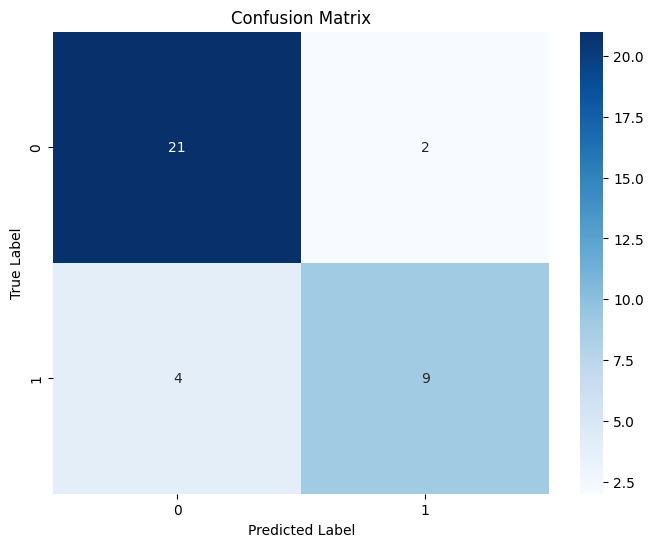

In [ ]:

def evaluate_random_forest(x_train, y_train, x_test, y_test):
    # Initialize and train the Random Forest classifier
    model_rf = RandomForestClassifier()
    model_rf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred_rd = model_rf.predict(x_test)

    # Print classification report
    print(classification_report(y_test, y_pred_rd))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred_rd), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    return y_pred_rd

y_pred_rd = evaluate_random_forest(x_train, y_train, x_test, y_test)


              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.75      0.69      0.72        13

    accuracy                           0.81        36
   macro avg       0.79      0.78      0.79        36
weighted avg       0.80      0.81      0.80        36



<Axes: >

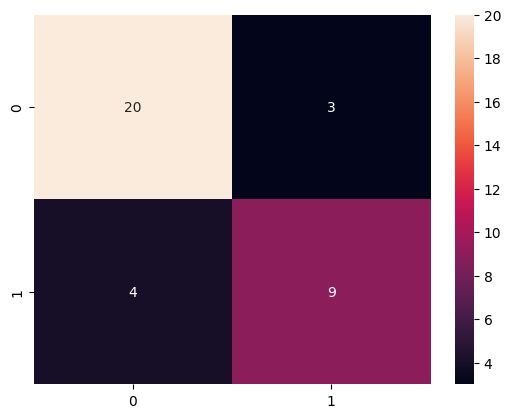

In [ ]:
rand_forest_model = RandomForestClassifier()
rand_forest_model = rand_forest_model.fit(x_train, y_train)
y_pred_rf =rand_forest_model.predict(x_test)
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True)

In [ ]:

accuracy, precision, recall, roc = [], [], [], []

# List of predictions
predictions = [y_pred_rf, y_pred_knn, y_pred_svm]

# Compute evaluation metrics for each model
for i in range(len(predictions)):
    accuracy.append(accuracy_score(y_test, predictions[i]))
    precision.append(precision_score(y_test, predictions[i]))
    recall.append(recall_score(y_test, predictions[i]))
    roc.append(roc_auc_score(y_test, predictions[i]))

# Create a DataFrame to compare evaluation metrics for each model
result = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC_score': roc},
                       index=['rf', 'knn', 'svm'])

# Sort the DataFrame by accuracy in descending order
result = result.sort_values('Accuracy', ascending=False)

print(result)

     Accuracy  Precision    Recall  ROC_score
knn  0.861111       1.00  0.615385   0.807692
svm  0.833333       1.00  0.538462   0.769231
rf   0.805556       0.75  0.692308   0.780936


In [ ]:

# Get feature importances
feature_importances = rand_forest_model.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)


                        Feature  Importance
2                   No_Payments    0.176851
4         Total_transaction_amt    0.155169
1                     No_Orders    0.072302
10              OrdersFulfilled    0.064959
17                      Voyager    0.054117
9                 card_Payments    0.044840
0               No_Transactions    0.044667
15                VISA_16_digit    0.041404
25            Duplicate_Address    0.031900
3           No_transactionsFail    0.031398
18                VISA_13_digit    0.029588
23           Transcation_failed    0.028784
11                 OrdersFailed    0.028745
13                 JCB_16_digit    0.028088
24                 Duplicate_IP    0.025039
19                      Maestro    0.020777
8              bitcoin_Payments    0.019251
6               paypal_Payments    0.019247
14             American_Express    0.016963
7            apple pay_Payments    0.011779
12                OrdersPending    0.010886
16                     Discover 